Задание 1. Вычислите производную функции в точке x0=1.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.optimize import curve_fit
from scipy.stats import norm
%matplotlib inline

In [ ]:
x0 = 1
x = sym.Symbol('x')
f = pow(sym.tan(sym.sin(x) + sym.cos(2*x+3)), 2)
derivative = sym.diff(f, x)
print(f'Производная функции: {derivative}')
derivative_x0 = derivative.subs(x, x0).evalf(n=6)
print(f'Производная функции в точке x0=1: {derivative_x0}')


Производная функции: 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
Производная функции в точке x0=1: 55.3859


Задание 2. Дан объект в 2D пространстве. При помощи матричных операций выполните:
*   Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)



(-200.0, 200.0)

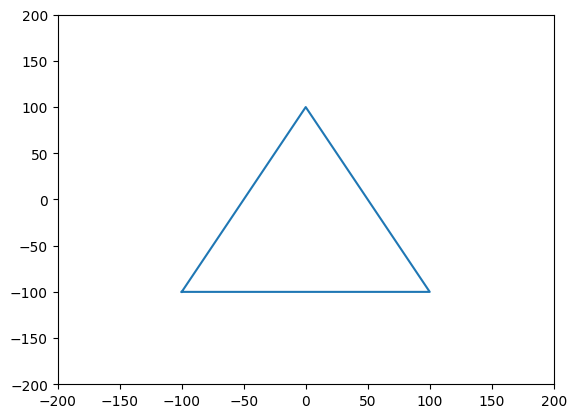

In [ ]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(100.0, 300.0)

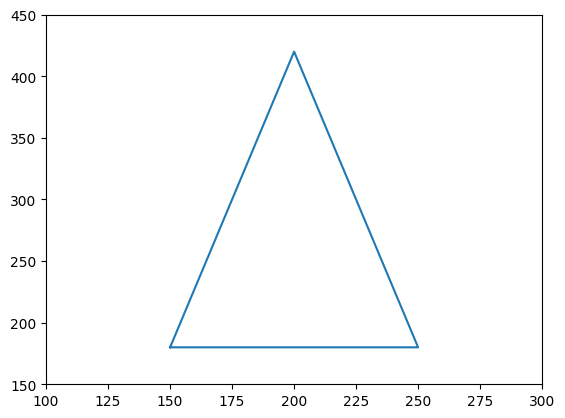

In [ ]:
transform1 = A @ np.array([[0.5,0,0], [0,1.2,0], [0,0,1]])
transform2 = transform1 @ np.array([[1,0,0], [0,1,0], [200,300,1]])

x2 = transform2[:,0]
y2 = transform2[:,1]
plt.plot(x2, y2)
plt.ylim([150, 450])
plt.xlim([100, 300])

Задание 3. Найдите собственные значения и собственные вектора матрицы.

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
print(f'Собственные значения матрицы:\n{np.linalg.eigvals(m)}')
print(f'Собственные вектора матрицы:\n{np.round(np.transpose(np.linalg.eig(m)[1]/0.4472136))}')

Собственные значения матрицы:
[ 3. -1.]
Собственные вектора матрицы:
[[ 2.  1.]
 [-2.  1.]]


Задание 4. Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.
Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

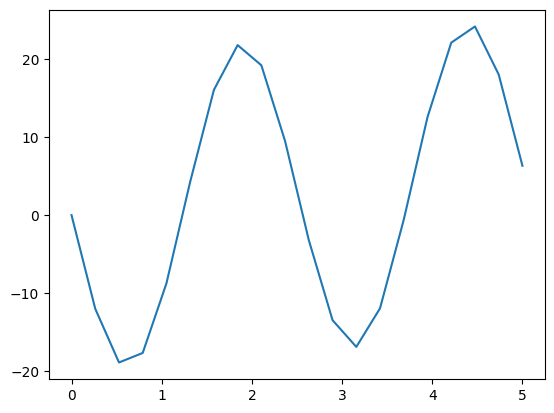

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
a_range = np.arange(0, 2, 0.1)
b_range = np.arange(0, 2, 0.1)

best_params = None
best_error = float('inf')

for a in a_range:
    for b in b_range:
        params, _ = curve_fit(f, x, fx, [a, b])
        if error(params) < best_error:
            best_params = params
            best_error = error(params)

print('Оптимальные параметры a и b:', best_params)

Оптимальные параметры a и b: [ 3.  -2.5]


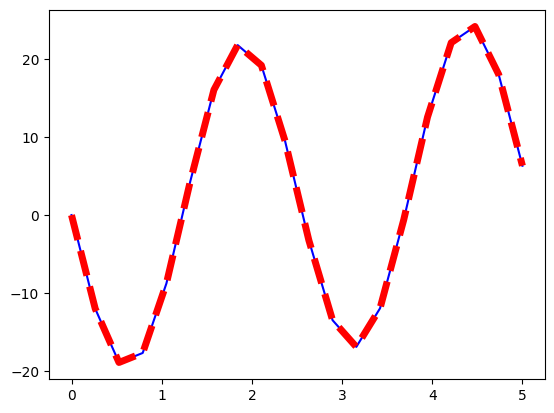

In [ ]:
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, best_params[0], best_params[1]), color = 'red', linestyle = '--', linewidth = 5)
plt.show()

Задание 5. Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов)). Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [ ]:
num_user, num_film = raitings.shape
sim_users = []
for user in range(num_user):
  min_cos_dist = float('inf')
  most_sim_user = None
  for next_user in range(num_user):
    if next_user == user: #для того, чтобы пользователь не сравнивался сам с собой
      continue
    #находим косинусную метрику (косинусное расстояние = 1 - cos(a)) каждого пользователя с каждым
    #чем меньше косинусное расстояние, тем более схожи векторы
    cos_dist = 1 - ((np.dot(raitings[user], raitings[next_user])) / (np.linalg.norm(raitings[user]) * np.linalg.norm(raitings[next_user])))

    if cos_dist < min_cos_dist: #определяем наиболее похожего пользователя для пользователя user
      min_cos_dist = cos_dist
      most_sim_user = next_user + 1 #+1, т.к. нумерация с 0
  sim_users.append((user + 1, most_sim_user)) #в массив сохраняем пары (пользователь, наиболее похожий по метрике пользователь)

print('Пары с наиболее похожими косинусными метриками:')
for users in sim_users:
  print(users)

Пары с наиболее похожими косинусными метриками:
(1, 9)
(2, 5)
(3, 10)
(4, 10)
(5, 9)
(6, 10)
(7, 4)
(8, 6)
(9, 1)
(10, 3)
